
Here’s a brief explanation of these performance metrics:

### 1. **MSE (Mean Squared Error)**:
   - **Formula**:  
     $$
     MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
     $$
   - **Explanation**:  
     It measures the average squared difference between actual values (\(y_i\)) and predicted values (\(\hat{y}_i\)). Lower values indicate better performance.

### 2. **MAE (Mean Absolute Error)**:
   - **Formula**:  
     $$
     MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
     $$
   - **Explanation**:  
     It calculates the average absolute difference between actual and predicted values. It’s easier to interpret since it doesn’t square the errors.

### 3. **RMSE (Root Mean Squared Error)**:
   - **Formula**:  
     $$
     RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
     $$
   - **Explanation**:  
     It’s the square root of MSE, giving errors in the same units as the output. A lower RMSE means a better fit.

### 4. **R² Score (Coefficient of Determination)**:
   - **Formula**:  
     $$
     R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
     $$
   - **Explanation**:  
     It measures how well the model explains the variance in the data. An \(R^2\) of 1 means perfect prediction, while 0 means no correlation.

### 5. **Adjusted R² Score**:
   - **Formula**:  
     $$
     Adjusted\, R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right)
     $$
   - **Explanation**:  
     It adjusts \(R^2\) based on the number of predictors in the model. It’s useful when comparing models with different numbers of variables, penalizing unnecessary ones

In [1]:
# Regression Metrics | MSE, MAE & RMSE | R2 Score & Adjusted R2 Score

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('placement1.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
df.shape

(200, 2)

Text(0, 0.5, 'Package(in LPA)')

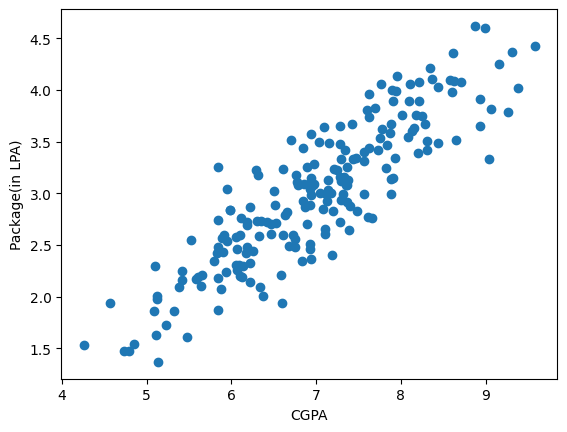

In [6]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')

In [7]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Package (in LPA)')

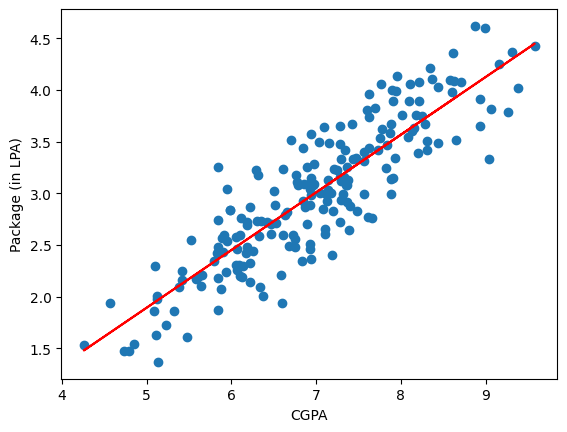

In [12]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
y_pred = lr.predict(X_test)

In [15]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [16]:
print('MAE', mean_absolute_error(y_test, y_pred))

MAE 0.2884710931878175


In [17]:
print('MSE', mean_squared_error(y_test, y_pred))

MSE 0.12129235313495527


In [18]:
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 0.34827051717731616


In [19]:
r2 = r2_score(y_test, y_pred)
print('R2 score', r2)

R2 score 0.780730147510384


In [20]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [21]:
1 - ((1 - r2) * (40 - 1) / (40 - 1 - 1))

0.7749598882343415

In [22]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa', 'random_feature', 'package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.628717,3.26
1,5.12,0.350272,1.98
2,7.82,0.428611,3.25
3,7.42,0.238013,3.67
4,6.94,0.537663,3.57


Text(0, 0.5, 'Package(in LPA)')

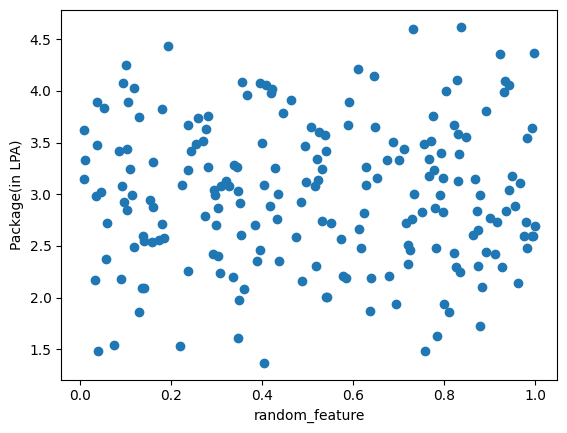

In [23]:
plt.scatter(new_df1['random_feature'], new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in LPA)')

In [24]:
X = new_df1.iloc[:, 0:2]
y = new_df1.iloc[:,-1]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)

In [29]:
print('R2 Score', r2_score(y_test, y_pred))

R2 Score 0.7810036460410108


In [30]:
r2 = r2_score(y_test, y_pred)

In [31]:
1 - ((1 - r2) * (40 - 1) / (40 - 1 - 2))

0.7691660052864708

In [32]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/ 10)

new_df2 = new_df2[['cgpa', 'iq', 'package']]

In [33]:
new_df2.sample(5)

,cgpa,iq,package
143,4.85,0.44,1.54
17,5.38,1.69,2.09
39,7.43,3.23,3.33
0,6.89,4.36,3.26
18,6.94,2.38,2.98


Text(0, 0.5, 'Package(in lpa)')

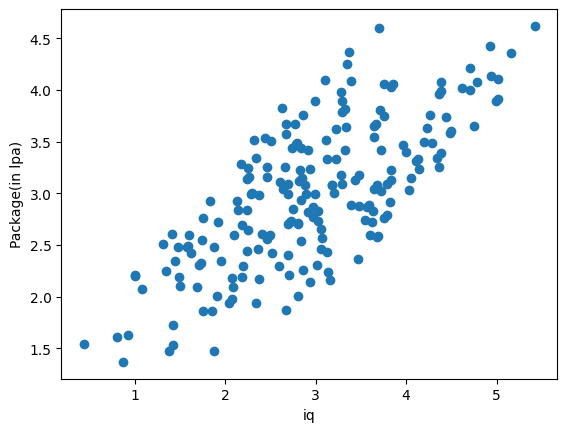

In [34]:
plt.scatter(new_df2['iq'], new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [35]:
np.random.randint(-100, 100)

-42

In [36]:
X = new_df2.iloc[:, 0:2]
y = new_df2.iloc[:,-1]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [39]:
r2 = r2_score(y_test, y_pred)
print('R2 Score', r2)

R2 Score 0.8241473113421773


In [40]:
1 - ((1 - r2) * (40 - 1) / (40 - 1 - 2))

0.8146417606039167